In [8]:
import copy
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def FFT(x, m = 1):
    N = len(x)
    if N <= 1: return x
    even = FFT(x[::2], m)
    not_even = FFT(x[1::2], m)

    exponents = np.exp(-2j * m * np.pi * np.arange(N) / N)
    return np.concatenate([even + exponents[ : N // 2] * not_even,
                     even + exponents[N // 2 :] * not_even])
def IFFT(fft):
    x = FFT(fft, -1)
    return x / len(x)

In [30]:
def linear(x):
    return x

def square_x(x):
    return x**2

def sin_x(x):
    return np.sin(x)

def sin_square_x(x):
    return np.sin(x ** 2)

def sin_div_x(x):
    return np.sin(x) / x

In [31]:
def draw(func, values=np.linspace(1, 10, 128), cut=0, title="") :
    result = func(values)
    transformed = FFT(result)
    if cut > 0:
        cut_num = int(len(values) * cut)
        title += "(cut = {} of {})".format(cut_num, len(values))
        transformed[-cut_num:] = 0
    distorted = IFFT(transformed)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(values, result, label="оригинальная функция")
    plt.plot(values, distorted, label="функция под действием FFT")
    plt.legend()
    plt.title(title)
    plt.show()

## Рубрика "Эксперименты"

/Users/veronika/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


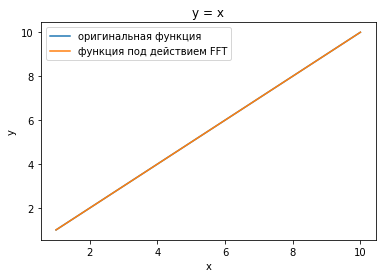

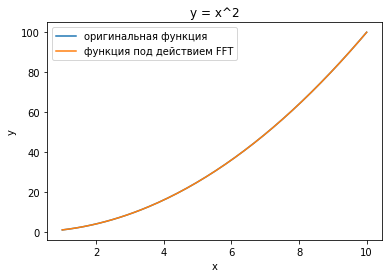

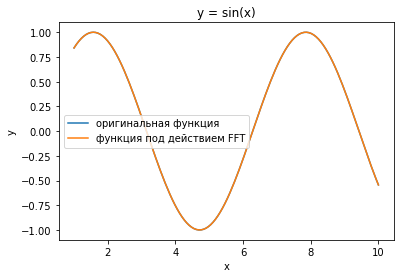

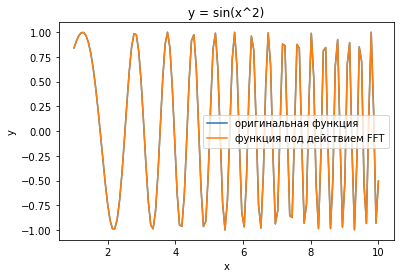

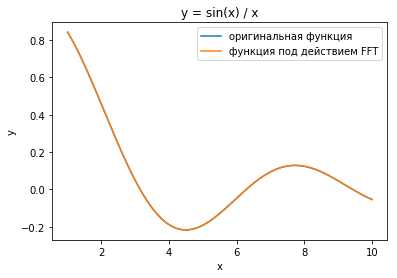

In [32]:
draw(linear, title="y = x")
draw(square_x, title="y = x^2")
draw(sin_x, title="y = sin(x)")
draw(sin_square_x, title="y = sin(x^2)")
draw(sin_div_x, title="y = sin(x) / x")

Разницы не видно, поэтому удалим небольшой процент коэффициентов 

/Users/veronika/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


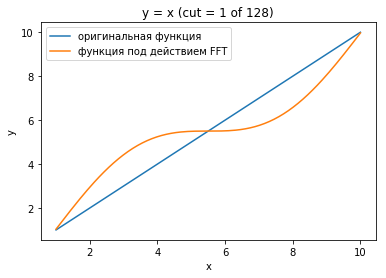

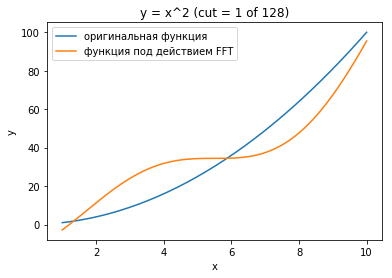

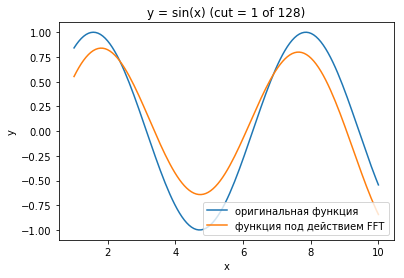

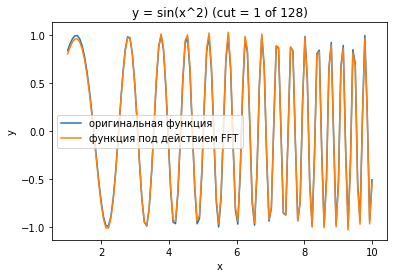

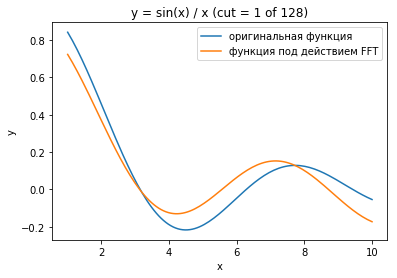

In [33]:
cut = 0.01
draw(linear, cut=cut, title="y = x ")
draw(square_x, cut=cut, title="y = x^2 ")
draw(sin_x, cut=cut, title="y = sin(x) ")
draw(sin_square_x, cut=cut, title="y = sin(x^2) ")
draw(sin_div_x, cut=cut, title="y = sin(x) / x ")

Даже при 1% графики меняются настолько, что разницу видно невооруженным взглядом. 

Продолжаем эксперименты.

/Users/veronika/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


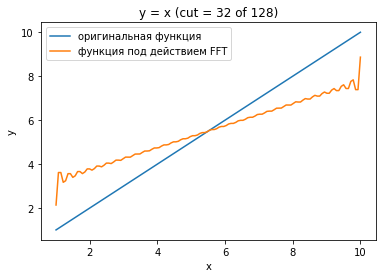

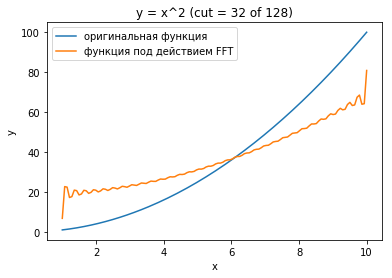

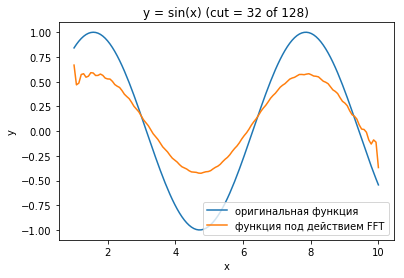

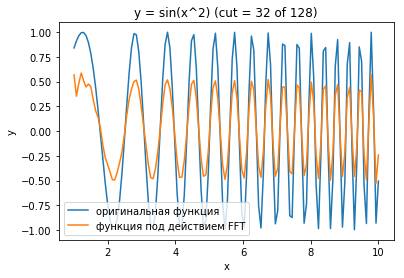

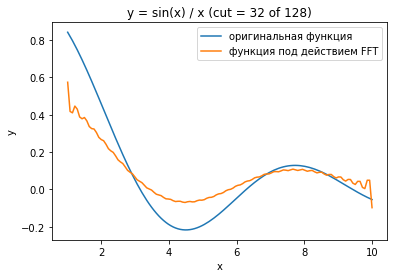

In [34]:
cut = 0.25
draw(linear, cut=cut, title="y = x ")
draw(square_x, cut=cut, title="y = x^2 ")
draw(sin_x, cut=cut, title="y = sin(x) ")
draw(sin_square_x, cut=cut, title="y = sin(x^2) ")
draw(sin_div_x, cut=cut, title="y = sin(x) / x ")

/Users/veronika/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


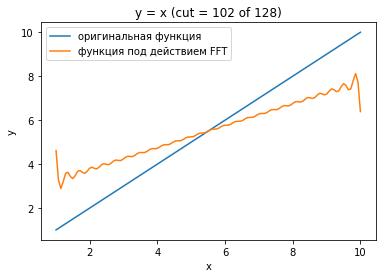

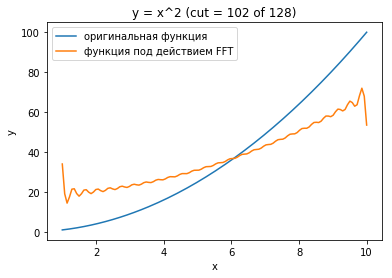

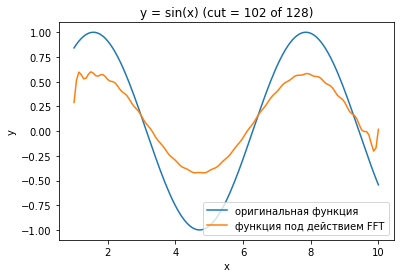

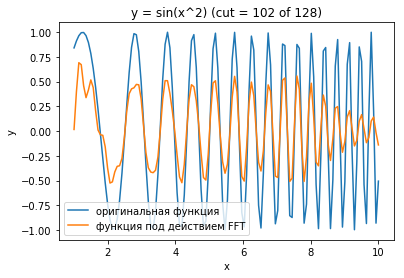

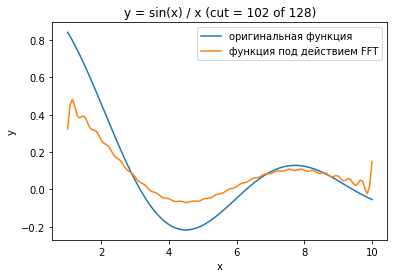

In [35]:
cut = 0.8
draw(linear, cut=cut, title="y = x ")
draw(square_x, cut=cut, title="y = x^2 ")
draw(sin_x, cut=cut, title="y = sin(x) ")
draw(sin_square_x, cut=cut, title="y = sin(x^2) ")
draw(sin_div_x, cut=cut, title="y = sin(x) / x ")